<a href="https://colab.research.google.com/github/yakubszatkowski/100_days_python/blob/master/push/Lego_Analysis_for_Course_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO 
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. I recommend you use download the .csv files provided in this lesson. 


---
<img src="https://i.imgur.com/49FNOHj.jpg">

---




# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
colors_df = pd.read_csv('drive/MyDrive/Colab Notebooks/Day 73 - Aggregate & Merge data with Pandas - Lego dataset/data/colors.csv')
colors_df

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f
...,...,...,...,...
130,1004,Trans Flame Yellowish Orange,FCB76D,t
131,1005,Trans Fire Yellow,FBE890,t
132,1006,Trans Light Royal Blue,B4D4F7,t
133,1007,Reddish Lilac,8E5597,f


# Data Exploration

**Challenge**: How many different colours does the LEGO company produce? Read the colors.csv file in the data folder and find the total number of unique colours. Try using the [.nunique() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique) to accomplish this.

In [4]:
# find the total number of unique colours
unique_color_count = colors_df['name'].nunique()
unique_color_count

135

**Challenge**: Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>. See if you can accomplish this in two different ways.

In [5]:
# figure out how many of the LEGO colours are transparent compared to how many colours are opaque

# 1st method
trans_boolean = colors_df['is_trans'] == 't'
trans_count = colors_df[trans_boolean].count().id  # the .id is just one parameter out of many, I've just wanted to get one clean value
opaque_count = colors_df.count().id - trans_count
print(f'There is {trans_count} transparent lego colors and {opaque_count} opaque.')

There is 28 transparent lego colors and 107 opaque.


In [6]:
# 2nd method - .value_counts()
is_trans_count = colors_df['is_trans'].value_counts()
is_trans_count

f    107
t     28
Name: is_trans, dtype: int64

In [7]:
# 3rd method - if value from is_trans column equals to t then sum
trans_count = (colors_df['is_trans'] == 't').sum()
trans_count

28

In [8]:
# 4th method - if value from is_trans columns equals to t then return true and get the length of true values within the dataframe
trans_boolean = colors_df['is_trans'] == 't'
len(colors_df[trans_boolean])

28

In [9]:
# 5th method - group dataframy by is_trans values then count them
trans_count = colors_df.groupby('is_trans').count().id
trans_count

is_trans
f    107
t     28
Name: id, dtype: int64




<h3>Understanding LEGO Themes vs. LEGO Sets</h3>

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

<img src="https://i.imgur.com/aKcwkSx.png">

A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

<img src="https://i.imgur.com/whB1olq.png">

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

**Challenge**: Read the sets.csv data and take a look at the first and last couple of rows. 

In [10]:
sets_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Day 73 - Aggregate & Merge data with Pandas - Lego dataset/data/sets.csv')
sets_df

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12
...,...,...,...,...,...
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52


In [ ]:
sets_df.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [ ]:
sets_df.tail()

,set_num,name,year,theme_id,num_parts
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52
15709,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413


**Challenge**: In which year were the first LEGO sets released and what were these sets called?

In [11]:
first_lego_sets_year = sets_df['year'].min()
first_lego_sets = sets_df[sets_df['year'] == first_lego_sets_year]
print(f'\n\nFirst lego sets were released in {first_lego_sets_year}\n')
first_lego_sets



First lego sets were released in 1949



,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


**Challenge**: How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [12]:
first_lego_sets.count().set_num

5

**Challenge**: Find the top 5 LEGO sets with the most number of parts. 

In [13]:
# 1st solution
sets_df.nlargest(5, 'num_parts')

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


In [14]:
# 2nd solution
sets_descending_num_parts = sets_df.sort_values('num_parts', ascending=False)
sets_descending_num_parts.head()

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


**Challenge**: Use <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019? 

In [15]:
# creating dataframe which has the years as the index and the number of sets as the value
sets_by_year = sets_df.groupby('year').count()['set_num']
sets_by_year

year
1949      5
1950      6
1953      4
1954     14
1955     28
       ... 
2017    786
2018    816
2019    840
2020    674
2021      3
Name: set_num, Length: 71, dtype: int64

**Challenge**: Show the number of LEGO releases on a line chart using Matplotlib. <br>
<br>
Note that the .csv file is from late 2020, so to plot the full calendar years, you will have to exclude some data from your chart. Can you use the slicing techniques covered in Day 21 to avoid plotting the last two years? The same syntax will work on Pandas DataFrames. 

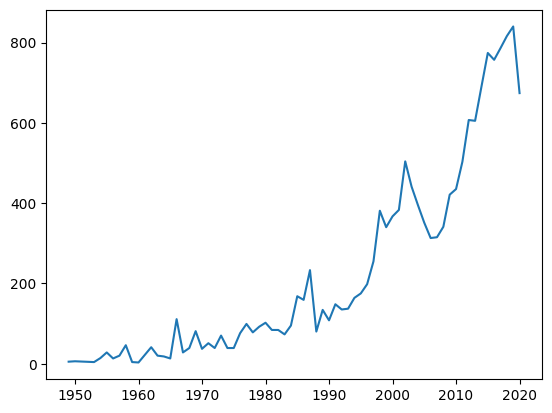

In [16]:
# creating a plot without year 2021 - by using list slicing
plt.plot(sets_by_year[:-1])

### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [17]:
# creating dataframe where group data by year, then counting the unique theme_ids for that year
themes_by_year = sets_df.groupby('year').nunique()['theme_id']
themes_by_year

year
1949     2
1950     1
1953     2
1954     2
1955     4
        ..
2017    89
2018    93
2019    78
2020    82
2021     1
Name: theme_id, Length: 71, dtype: int64

In [18]:
# .agg() in this case calculates number of unique numbers in theme_id column
themes_by_year = sets_df.groupby('year').agg({'theme_id': pd.Series.nunique})
themes_by_year

,theme_id
year,
1949,2
1950,1
1953,2
1954,2
1955,4
...,...
2017,89
2018,93
2019,78


In [19]:
themes_by_year.rename(columns = {'theme_id': 'nr_themes'}, inplace = True)
themes_by_year

,nr_themes
year,
1949,2
1950,1
1953,2
1954,2
1955,4
...,...
2017,89
2018,93
2019,78


**Challenge**: Plot the number of themes released by year on a line chart. Only include the full calendar years (i.e., exclude 2021). 

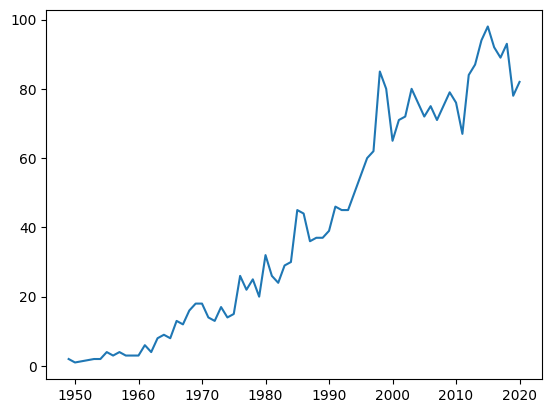

In [20]:
plt.plot(themes_by_year[:-1], label='Number of themes by year')

### Line Charts with Two Seperate Axes

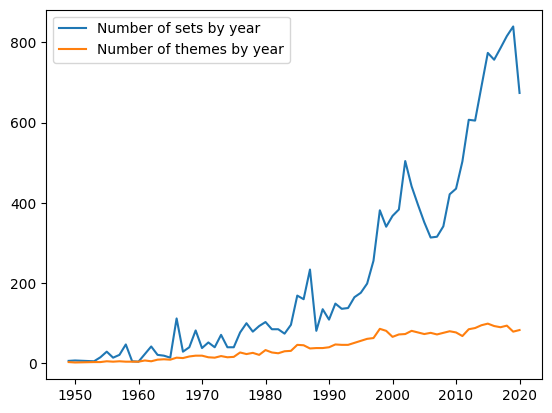

In [21]:
# this plot doesn't visualise the the number of sets and themes thoughout the years very well because of different scales 
plt.plot(sets_by_year[:-1], label='Number of sets by year')  # values between 0 and 900
plt.plot(themes_by_year[:-1], label='Number of themes by year')  # values between 0 and 90
plt.legend()

Text(0, 0.5, 'Number of themes by year')

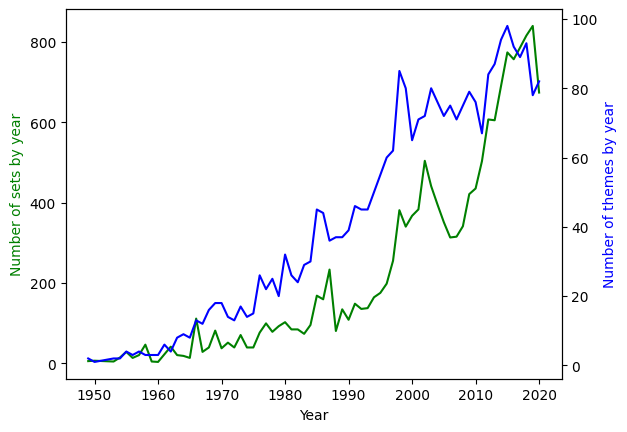

In [22]:
# we need to create two Y axis in order to visualise data in more transparent way
ax1 = plt.gca()  # this gets the current axis
ax2 = ax1.twinx()  # create another axis that shares the same x-axis

ax1.plot(sets_by_year[:-1], label='Number of sets by year', color='g')
ax2.plot(themes_by_year[:-1], label='Number of themes by year', color='b')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of sets by year', color='g')
ax2.set_ylabel('Number of themes by year', color='b')

**Challenge**: Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

In [23]:
parts_per_set = sets_df.groupby('year').agg({'num_parts':pd.Series.mean}, inplace=True)[:-1]
parts_per_set

,num_parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143
...,...
2016,209.920740
2017,221.840967
2018,213.618873


In [24]:
# 1st solution - shows location from by year (id)
parts_per_set.loc[[1954, 2017]]

,num_parts
year,
1954,12.357143
2017,221.840967


### Scatter Plots in Matplotlib

**Challenge**: Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot. See if you can use the [scatter plot documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) before I show you the solution. Do you spot a trend in the chart? 

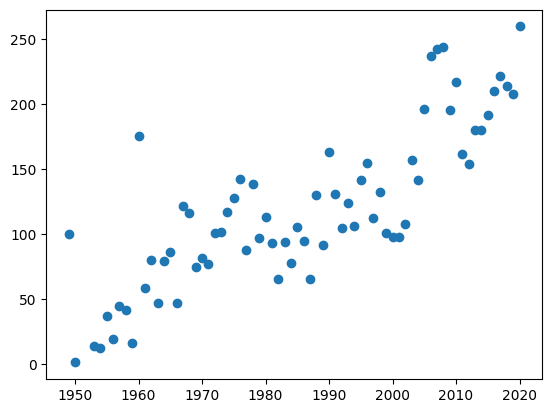

In [25]:
plt.scatter(parts_per_set.index, parts_per_set)

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets? 

In [104]:
# counting number of sets by theme_id by .value_counts() - it counts the number of unique values in a series/dataframe
# 1st solution
sets_df['theme_id'].value_counts()

158    753
501    656
494    398
435    356
503    329
      ... 
307      1
215      1
361      1
210      1
414      1
Name: theme_id, Length: 571, dtype: int64

In [39]:
# 2nd solution
sets_df.groupby('theme_id').size().sort_values(ascending=False)

theme_id
158    753
501    656
494    398
435    356
503    329
      ... 
212      1
210      1
200      1
509      1
368      1
Length: 571, dtype: int64

In [36]:
# checking so i can understand the value_counts() 
(sets_df['theme_id'] == 158).value_counts()  # this means that there are 753 rows with theme id equal to 158

False    15543
True       167
Name: theme_id, dtype: int64

**Challenge** Use what you know about HTML markup and tags to display the database schema: https://i.imgur.com/Sg4lcjx.png

<img src="https://i.imgur.com/Sg4lcjx.png">

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv. 

**Challenge**: Explore the themes.csv. How is it structured? Search for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv? Now use these <code>id</code>s and find the corresponding the sets in the sets.csv (Hint: you'll need to look for matches in the <code>theme_id</code> column)

In [118]:
themes_df = pd.read_csv('drive/MyDrive/Colab Notebooks/Day 73 - Aggregate & Merge data with Pandas - Lego dataset/data/themes.csv')
themes_df

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0
...,...,...,...
591,705,Iron Man,696.0
592,706,Spider-Man,696.0
593,707,X-Men,696.0
594,708,The LEGO Batman Movie,697.0


How many ids correspond to this name in the themes.csv?

In [59]:
# 1st solution 
count_id_themes = themes_df.groupby('name').count().id
count_id_themes.loc[['Star Wars']] # shows many id's correspond to 'Star Wars' theme name

name
Star Wars    4
Name: id, dtype: int64

In [100]:
# 2nd solution
count_id_themes = themes_df.groupby('name').agg({'id': pd.Series.count})
count_id_themes.loc[['Star Wars']]

,id
name,
Star Wars,4


In [71]:
# 3rd solution
count_id_themes = themes_df[(themes_df['name'] == 'Star Wars')].count()
count_id_themes

id           4
name         4
parent_id    3
dtype: int64

Now printing those IDs

In [74]:
# IDs with 'Star Wars' theme
# 1st solution
themes_df.loc[(themes_df['name'] == 'Star Wars')] # .loc is not necessary alno the () in the list

,id,name,parent_id
17,18,Star Wars,1.0
150,158,Star Wars,NaN
174,209,Star Wars,207.0
211,261,Star Wars,258.0


In [80]:
# 2nd solution
themes_df.loc[themes_df['name'].isin(['Star Wars'])] # it is possible to pass multitple values in the list

,id,name,parent_id
17,18,Star Wars,1.0
150,158,Star Wars,NaN
174,209,Star Wars,207.0
211,261,Star Wars,258.0


Now use these ids and find the corresponding the sets in the sets.csv (Hint: you'll need to look for matches in the theme_id column)

In [96]:
star_wars_ids = themes_df.loc[(themes_df['name'] == 'Star Wars')]['id']
sets_df.loc[sets_df['theme_id'].isin(star_wars_ids)]


,set_num,name,year,theme_id,num_parts
850,11912-1,Star Wars: Build Your Own Adventure,2016,158,73
855,11920-1,Parts for Star Wars Build Your Own Adventure: ...,2019,158,70
1717,20006-1,Clone Turbo Tank - Mini,2008,158,64
1728,20007-1,Republic Attack Cruiser - Mini,2009,158,84
1738,20009-1,AT-TE Walker - Mini,2009,158,94
...,...,...,...,...,...
15686,VP-4,Star Wars Co-Pack of 7101 7111 and 7171,2000,158,0
15689,VP-8,Star Wars Co-Pack of 7130 and 7150,2000,158,0
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52


In [97]:
# angela was comparing separetely by id's like this:
sets_df[sets_df.theme_id == 18]
# ids were: 18, 158, 209, 261

,set_num,name,year,theme_id,num_parts
8786,65081-1,R2-D2 / C-3PO Droid Collectors Set,2002,18,1
12051,8000-1,Pit Droid,2000,18,223
12058,8001-1,Battle Droid,2000,18,336
12066,8002-1,Destroyer Droid,2000,18,567
12071,8007-1,C-3PO,2001,18,339
12072,8008-1,Stormtrooper,2001,18,360
12073,8009-1,R2-D2,2002,18,239
12074,8010-1,Darth Vader,2002,18,388
12081,8011-1,Jango Fett,2002,18,425
12083,8012-1,Super Battle Droid,2002,18,378


### Merging (i.e., Combining) DataFrames based on a Key


In [116]:
# this is how set_theme_count looks now
set_theme_count = sets_df['theme_id'].value_counts()

print(set_theme_count)
type(set_theme_count)

158    753
501    656
494    398
435    356
503    329
      ... 
307      1
215      1
361      1
210      1
414      1
Name: theme_id, Length: 571, dtype: int64


pandas.core.series.Series

In [120]:
# Creating a DataFrame from series through a dictionary
set_theme_count_df = pd.DataFrame({
    'id': set_theme_count.index,
    'set_count': set_theme_count.values
})
set_theme_count_df

,id,set_count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329
...,...,...
566,307,1
567,215,1
568,361,1
569,210,1


In [121]:
themes_df

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0
...,...,...,...
591,705,Iron Man,696.0
592,706,Spider-Man,696.0
593,707,X-Men,696.0
594,708,The LEGO Batman Movie,697.0


In [122]:
# merging two dataframes based on 'id' column - the merge method works on columns with the same name in both DataFrames
merged_df = pd.merge(set_theme_count_df, themes_df, on='id')
merged_df

,id,set_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN
3,435,356,Ninjago,NaN
4,503,329,Key Chain,501.0
...,...,...,...,...
566,307,1,Aquazone,NaN
567,215,1,Pirates,207.0
568,361,1,Skull Spiders,324.0
569,210,1,Belville,207.0


<BarContainer object of 10 artists>

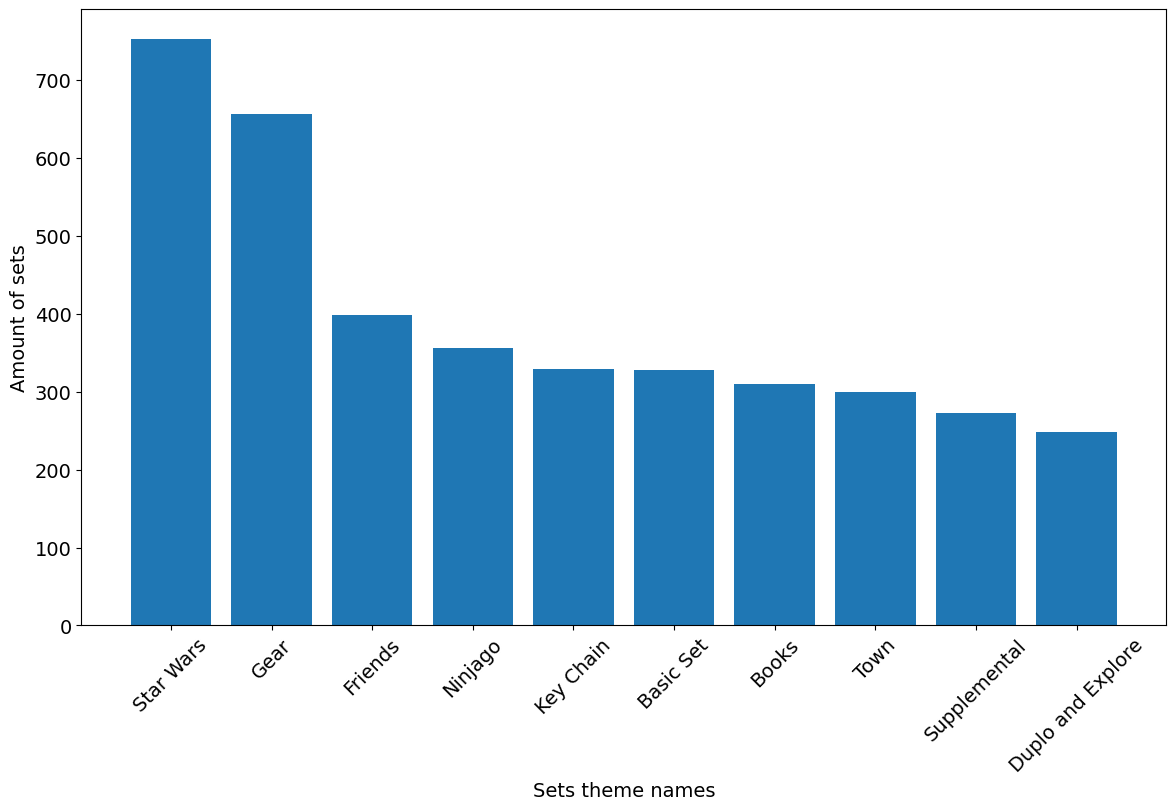

In [126]:
# cosmetics for plt
plt.figure(figsize=(14,8))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.xlabel('Sets theme names', fontsize=14)
plt.ylabel('Amount of sets', fontsize=14)

# creating a bar chart of the top 10 themes
plt.bar(merged_df.name[:10], merged_df.set_count[:10])

# In this lesson we looked at how to:

* use HTML Markdown in Notebooks, such as section headings # and how to embed images with the <img> tag.

* combine the `.groupby()` and `.count()` functions to aggregate data

* use the `.value_counts()` function

* slice DataFrames using the square bracket notation e.g., `.df[:-2]` or `.df[:10]`

* use the `.agg()` function to run an operation on a particular column

* `.rename()` columns of DataFrames

* create a line chart with two separate axes to visualise data that have different scales.

* create a scatter plot in Matplotlib

* work with tables in a relational database by using primary and foreign keys

* `.merge()` DataFrames along a particular column

* create a bar chart with Matplotlib